In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('bank-additional-full.csv',sep=';')

In [3]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

# Outlier Detection

In [5]:
numeric_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()

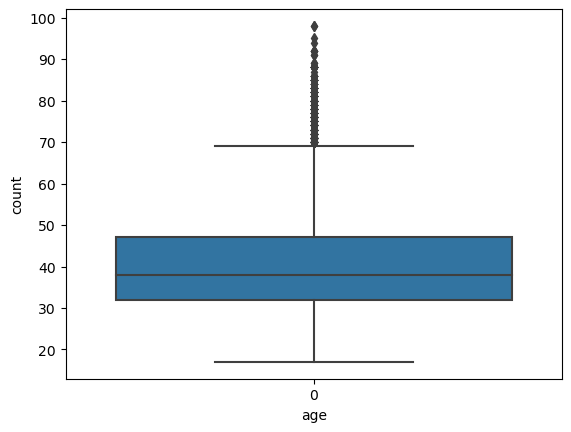

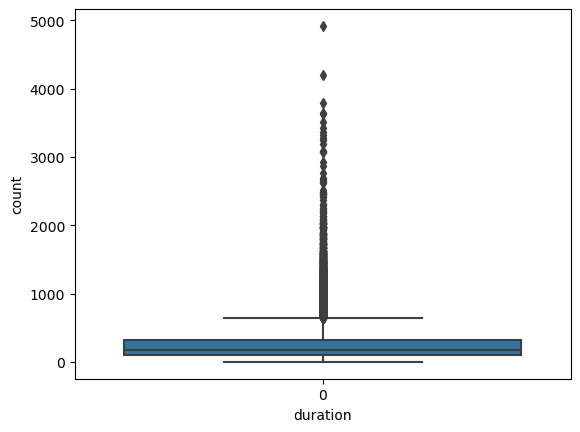

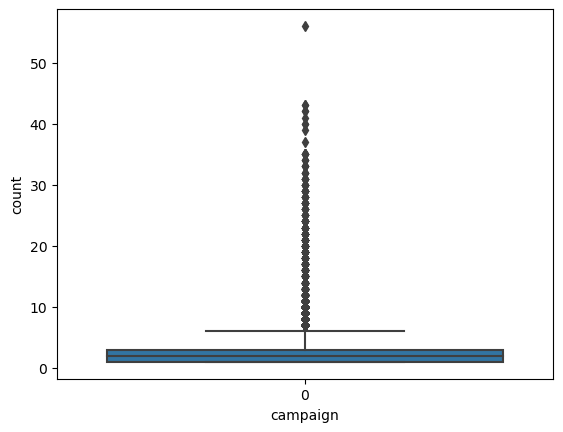

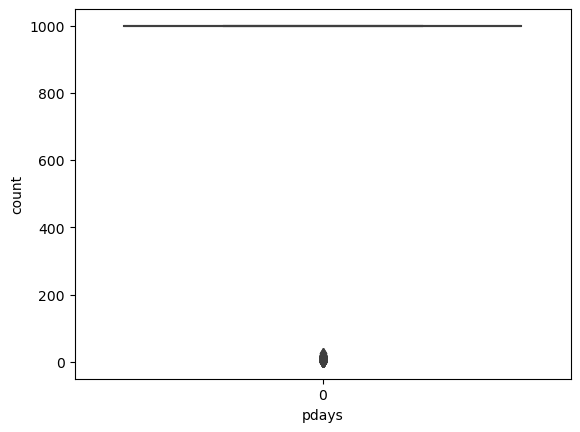

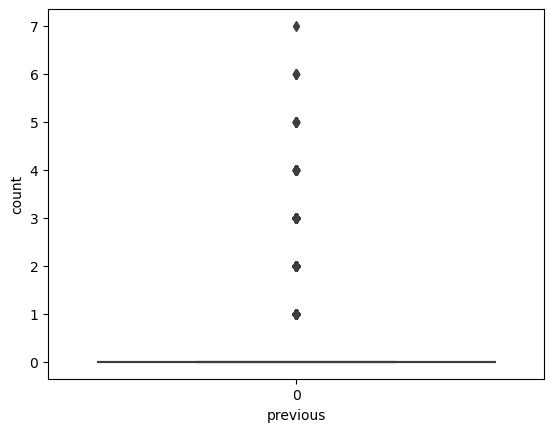

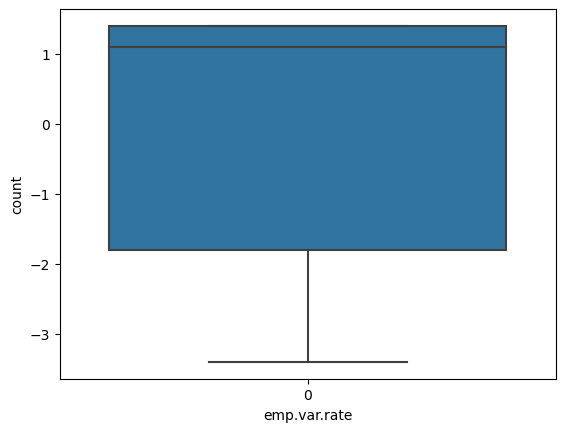

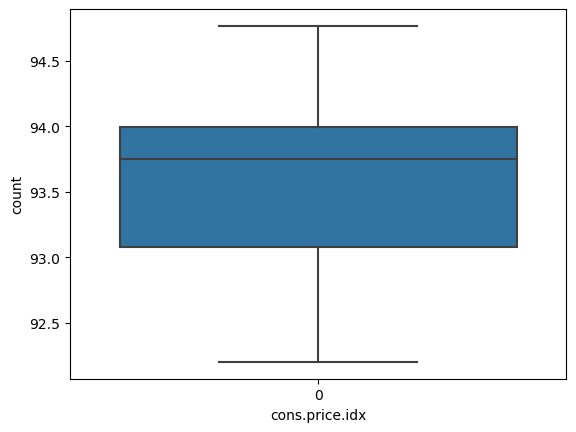

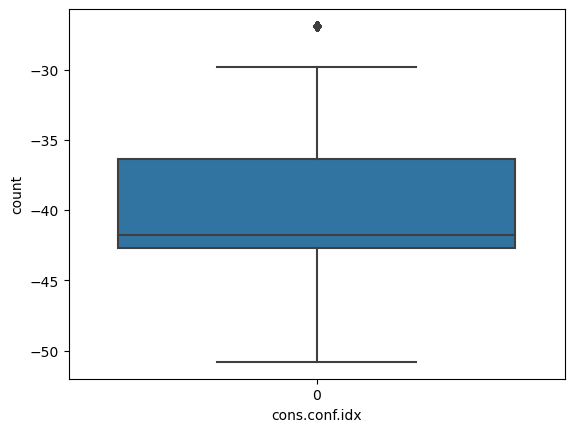

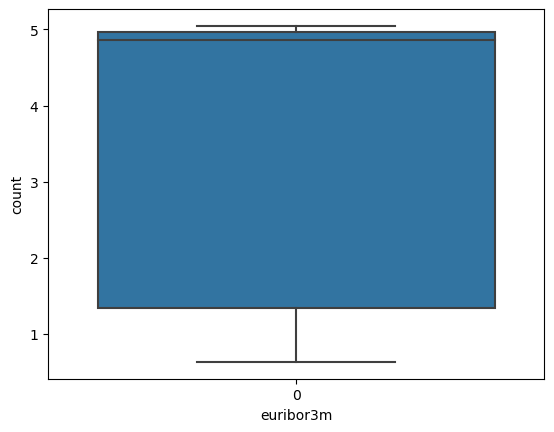

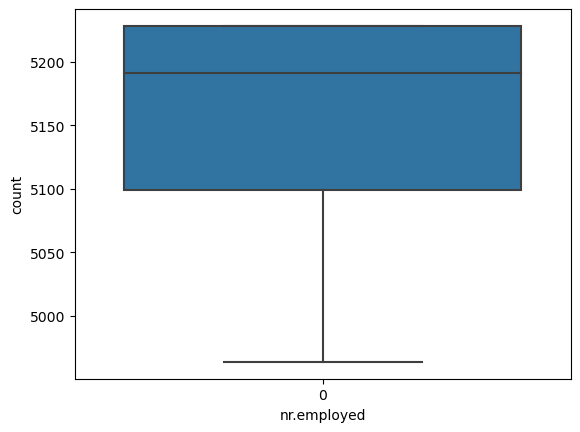

In [6]:
for i in numeric_columns:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

In [17]:
for i in numeric_columns:
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    df = df[(df[i] >= Q1 - 1.5*IQR) & (df[i] <= Q3 + 1.5*IQR)]

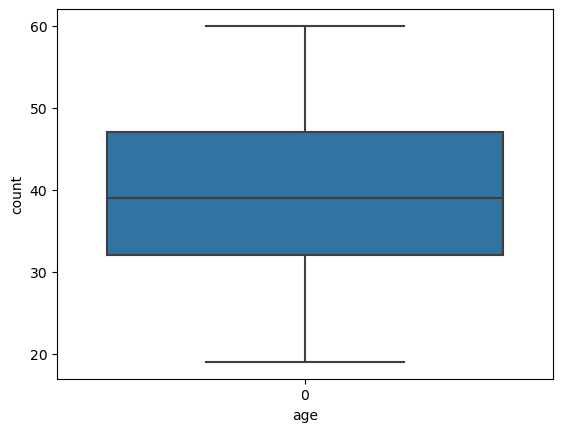

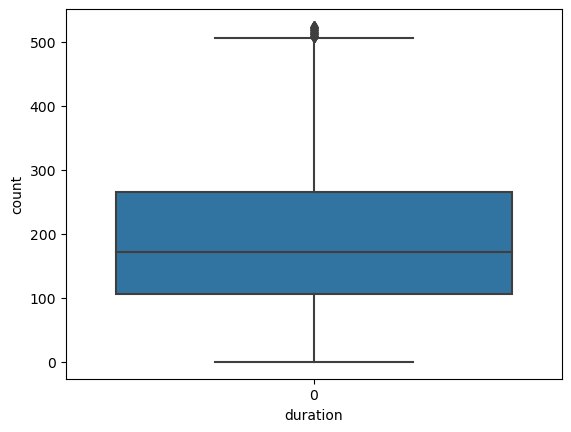

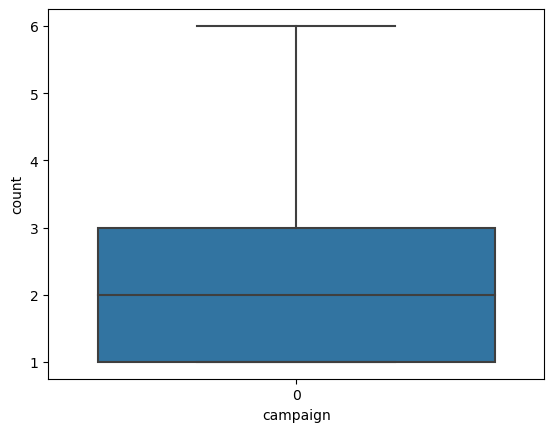

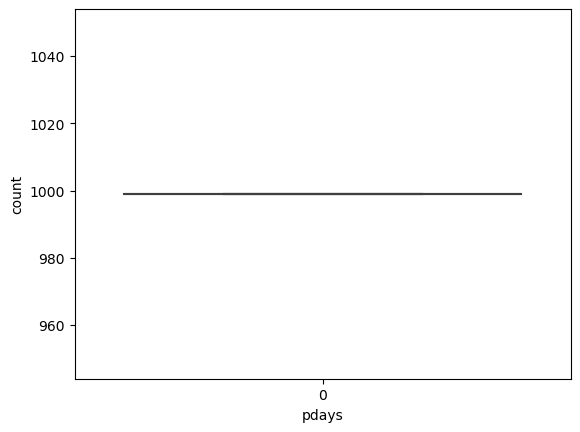

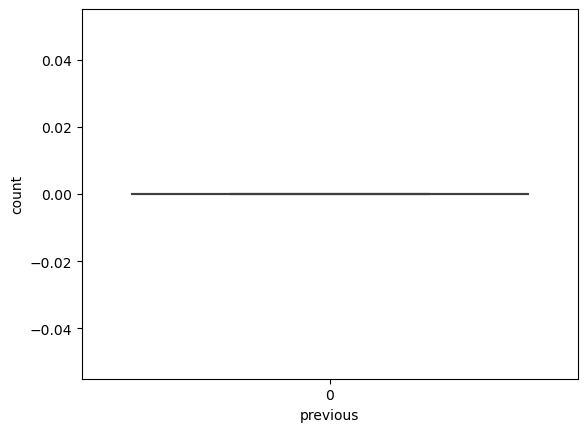

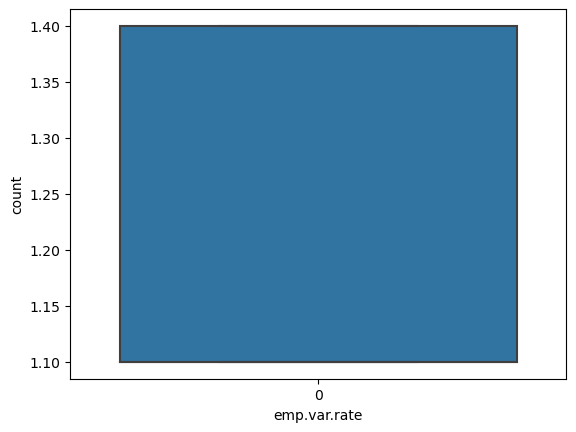

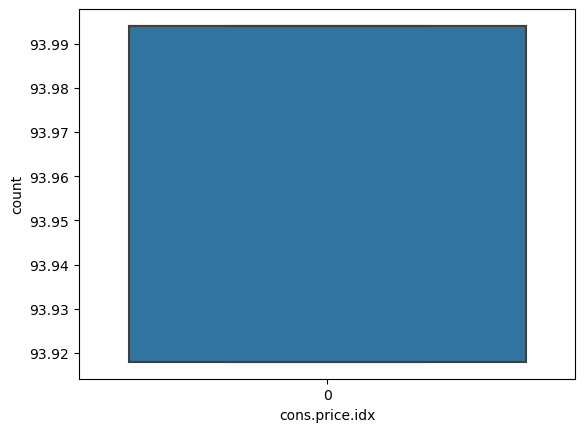

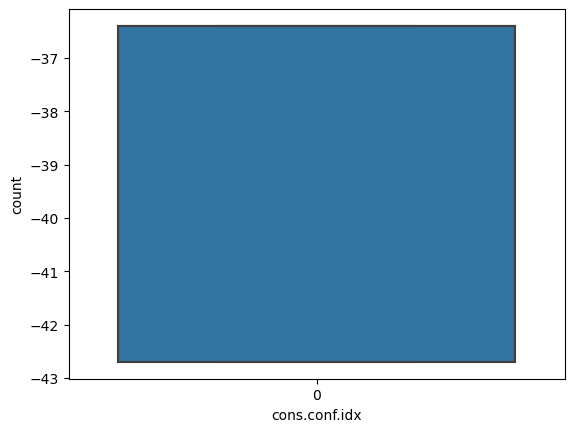

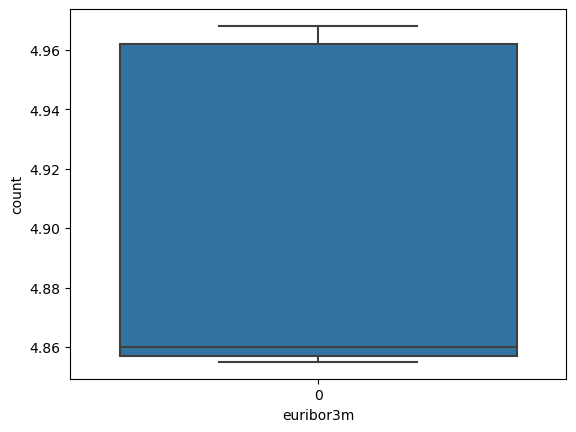

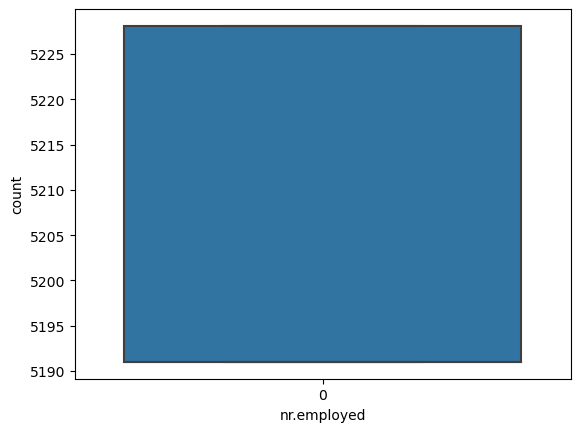

In [18]:
for i in numeric_columns:
    sns.boxplot(df[i])
    plt.xlabel(i)
    plt.ylabel('count')
    plt.show()

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11814 entries, 0 to 18819
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             11814 non-null  int64  
 1   job             11814 non-null  object 
 2   marital         11814 non-null  object 
 3   education       11814 non-null  object 
 4   default         11814 non-null  object 
 5   housing         11814 non-null  object 
 6   loan            11814 non-null  object 
 7   contact         11814 non-null  object 
 8   month           11814 non-null  object 
 9   day_of_week     11814 non-null  object 
 10  duration        11814 non-null  int64  
 11  campaign        11814 non-null  int64  
 12  pdays           11814 non-null  int64  
 13  previous        11814 non-null  int64  
 14  poutcome        11814 non-null  object 
 15  emp.var.rate    11814 non-null  float64
 16  cons.price.idx  11814 non-null  float64
 17  cons.conf.idx   11814 non-null 

# Label Encoding

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encode = LabelEncoder()

In [25]:
obj_cols = df.select_dtypes(include =['object']).columns.tolist()

In [26]:
obj_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

In [28]:
for i in obj_cols:
    df[i] = encode.fit_transform(df[i])

In [29]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 11814 entries, 0 to 18819
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             11814 non-null  int64  
 1   job             11814 non-null  int32  
 2   marital         11814 non-null  int32  
 3   education       11814 non-null  int32  
 4   default         11814 non-null  int32  
 5   housing         11814 non-null  int32  
 6   loan            11814 non-null  int32  
 7   contact         11814 non-null  int32  
 8   month           11814 non-null  int32  
 9   day_of_week     11814 non-null  int32  
 10  duration        11814 non-null  int64  
 11  campaign        11814 non-null  int64  
 12  pdays           11814 non-null  int64  
 13  previous        11814 non-null  int64  
 14  poutcome        11814 non-null  int32  
 15  emp.var.rate    11814 non-null  float64
 16  cons.price.idx  11814 non-null  float64
 17  cons.conf.idx   11814 non-null 

In [30]:
x = df.iloc[:,:-1]

In [31]:
x

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,3,1,0,0,0,0,1,1,1,261,1,999,0,0,1.1,93.994,-36.4,4.857,0
1,57,7,1,3,1,0,0,1,1,1,149,1,999,0,0,1.1,93.994,-36.4,4.857,0
2,37,7,1,3,0,2,0,1,1,1,226,1,999,0,0,1.1,93.994,-36.4,4.857,0
3,40,0,1,1,0,0,0,1,1,1,151,1,999,0,0,1.1,93.994,-36.4,4.857,0
4,56,7,1,3,0,0,2,1,1,1,307,1,999,0,0,1.1,93.994,-36.4,4.857,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18811,36,7,1,3,0,2,0,0,0,2,14,6,999,0,0,1.4,93.918,-42.7,4.968,1
18812,54,4,1,6,1,2,0,1,0,2,11,5,999,0,0,1.4,93.918,-42.7,4.968,1
18813,46,7,1,2,0,0,0,0,0,2,153,4,999,0,0,1.4,93.918,-42.7,4.968,1
18816,27,0,2,3,0,0,0,1,0,2,135,3,999,0,0,1.4,93.918,-42.7,4.968,1


In [32]:
y = df.iloc[:,-1]

In [33]:
y

0        0
1        0
2        0
3        0
4        0
        ..
18811    0
18812    0
18813    0
18816    0
18819    0
Name: y, Length: 11814, dtype: int32

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state=42)

In [36]:
x_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
367,57,0,0,2,0,0,0,1,1,3,306,1,999,0,0,1.1,93.994,-36.4,4.857,0
18537,41,6,0,6,0,0,2,0,0,2,52,6,999,0,0,1.4,93.918,-42.7,4.968,1
3126,31,2,2,2,0,0,0,1,1,2,183,1,999,0,0,1.1,93.994,-36.4,4.860,0
7143,49,1,1,7,1,0,0,1,1,2,246,2,999,0,0,1.1,93.994,-36.4,4.860,0
1762,36,2,1,6,0,0,2,1,1,0,180,1,999,0,0,1.1,93.994,-36.4,4.855,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18060,43,0,1,3,0,2,0,0,0,4,25,1,999,0,0,1.4,93.918,-42.7,4.963,1
6059,46,7,0,3,0,2,0,1,1,3,78,1,999,0,0,1.1,93.994,-36.4,4.857,0
6282,34,9,2,5,0,0,2,1,1,3,3,1,999,0,0,1.1,93.994,-36.4,4.857,0
941,44,1,1,2,1,1,1,1,1,4,199,1,999,0,0,1.1,93.994,-36.4,4.856,0


In [37]:
x_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
17501,51,9,1,2,1,0,0,0,0,1,116,3,999,0,0,1.4,93.918,-42.7,4.962,1
3801,40,1,1,1,0,2,0,1,1,0,130,3,999,0,0,1.1,93.994,-36.4,4.859,0
14339,31,9,1,3,0,0,0,0,0,1,101,3,999,0,0,1.4,93.918,-42.7,4.962,1
3596,39,1,1,3,0,0,0,1,1,0,46,1,999,0,0,1.1,93.994,-36.4,4.859,0
7341,41,4,2,3,0,2,0,1,1,0,324,1,999,0,0,1.1,93.994,-36.4,4.864,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6205,31,4,2,6,1,2,0,1,1,3,174,2,999,0,0,1.1,93.994,-36.4,4.857,0
14229,29,0,1,3,1,0,0,0,0,1,35,3,999,0,0,1.4,93.918,-42.7,4.962,1
14449,51,5,1,6,1,0,0,0,0,3,94,3,999,0,0,1.4,93.918,-42.7,4.961,1
1268,39,1,1,1,0,0,0,1,1,2,393,1,999,0,0,1.1,93.994,-36.4,4.855,0


In [38]:
y_train

367      0
18537    0
3126     0
7143     0
1762     0
        ..
18060    0
6059     0
6282     0
941      0
12917    0
Name: y, Length: 7915, dtype: int32

In [39]:
y_test

17501    0
3801     0
14339    0
3596     0
7341     0
        ..
6205     0
14229    0
14449    0
1268     0
12555    0
Name: y, Length: 3899, dtype: int32

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
model1 = LogisticRegression()

In [74]:
model1.fit(x_train,y_train)

C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [75]:
y_pred1 = model1.predict(x_test)

In [76]:
y_pred1

array([0, 0, 0, ..., 0, 0, 0])

In [77]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [78]:
accuracy_score(y_test,y_pred1)

0.9943575275711721

In [79]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00      3877
           1       0.00      0.00      0.00        22

    accuracy                           0.99      3899
   macro avg       0.50      0.50      0.50      3899
weighted avg       0.99      0.99      0.99      3899



C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Owner\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [80]:
confusion_matrix(y_pred1,y_test)

array([[3877,   22],
       [   0,    0]], dtype=int64)

# Feature Selection

In [81]:
from sklearn.feature_selection import mutual_info_classif

In [82]:
mutual_info = mutual_info_classif(x_train,y_train)

In [83]:
mutual_info

array([1.55404070e-03, 0.00000000e+00, 4.70741008e-04, 0.00000000e+00,
       1.09781650e-03, 1.12156869e-03, 5.45505969e-05, 1.30373855e-03,
       1.84364446e-03, 0.00000000e+00, 8.19438885e-03, 1.33119639e-03,
       1.10372397e-03, 0.00000000e+00, 0.00000000e+00, 1.32678542e-03,
       1.24923883e-03, 1.75501336e-03, 2.17101529e-03, 8.95433044e-05])

In [84]:
mutual_info = pd.Series(mutual_info)

In [85]:
mutual_info

0     0.001554
1     0.000000
2     0.000471
3     0.000000
4     0.001098
5     0.001122
6     0.000055
7     0.001304
8     0.001844
9     0.000000
10    0.008194
11    0.001331
12    0.001104
13    0.000000
14    0.000000
15    0.001327
16    0.001249
17    0.001755
18    0.002171
19    0.000090
dtype: float64

<Axes: >

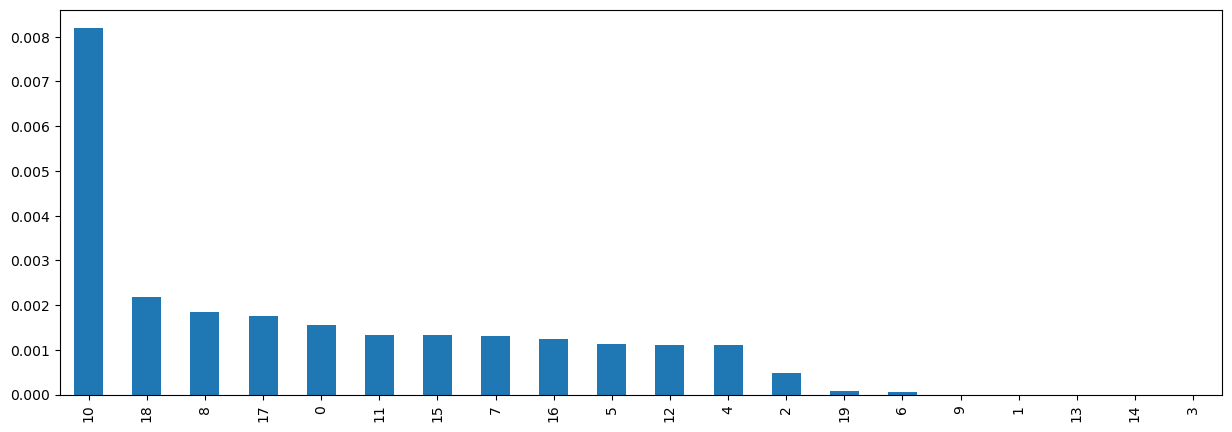

In [86]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [87]:
from sklearn.feature_selection import SelectKBest

In [95]:
sel_five_cols = SelectKBest(mutual_info_classif,k=8)

In [96]:
sel_five_cols

SelectKBest(k=8,
            score_func=<function mutual_info_classif at 0x0000024EB17BA5F0>)

In [97]:
sel_five_cols.fit(x_train,y_train)

SelectKBest(k=8,
            score_func=<function mutual_info_classif at 0x0000024EB17BA5F0>)

In [98]:
x_train.columns[sel_five_cols.get_support()]

Index(['marital', 'contact', 'month', 'duration', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')